In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib_inline.backend_inline as plt_inline
plt_inline.set_matplotlib_formats('svg')

In [2]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [108]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

**Checking duplicates before we do anytihng.**

In [151]:
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

In [109]:
y = train_df['SalePrice']
X = pd.concat([train_df.drop(['SalePrice'], axis=1), test_df])
X.set_index('Id', inplace=True)
print(X.shape)
X.head()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [19]:
def see_distribution(df):
    plt.figure(figsize=(8, 4))
    sns.histplot(df, kde=True, bins=30, color='green')
    plt.title(f'Distribution of {df.name}')
    plt.xlabel(df.name)
    plt.ylabel('Frequency')
    plt.show()

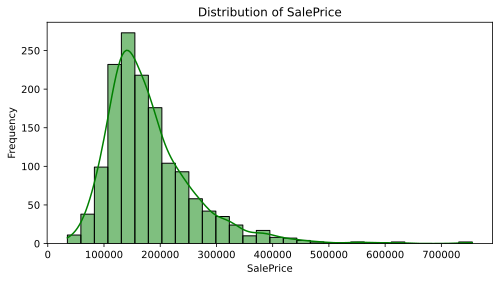

In [20]:
see_distribution(y)

- We can observe the SalePrice distribution is right skewed. This can be fixed with log transformation. 

**Let's see which columns are numerical and categorical.**

In [28]:
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
non_numerical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numerical columns:\n{numerical_cols}\n")
print(f"Non-numerical columns:\n{non_numerical_cols}\n")

Numerical columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Non-numerical columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType

## Missing Values

In [136]:
X.isnull().sum()[X.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

- We can see there are lot of null values present. 
- We have to deal with them in case by case basis.
    - Will see if null values represent a value or category itself by refering the data description.
    - Will see if we can derive to some conclusion using other columns.

**Let's see which features have more than 70% null values.**

In [42]:
null_percentage = X.isnull().mean()  # Percentage of null values in each column
columns_95_percent_null = null_percentage[null_percentage > 0.70] 
columns_95_percent_null

Alley          0.932169
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

- We can see Alley, PoolQc, Fence, MiscFeature are the 4 features with more than 70% null values.

**Let's dive deeper if they represent meaningfull correlation.**

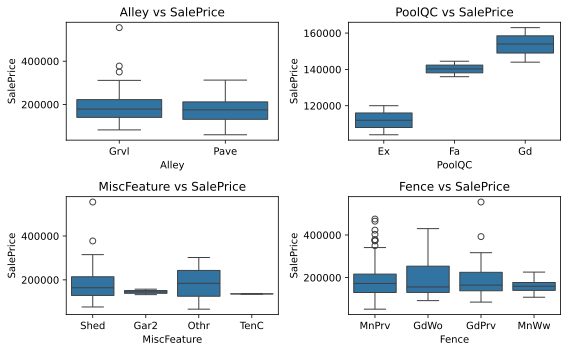

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
axes = axes.flatten()

features = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']

for ax, feature in zip(axes, features):
    sns.boxplot(x=feature, y=y, data=X, ax=ax)
    ax.set_title(f'{feature} vs {y.name}')
    ax.set_xlabel(feature)
    ax.set_ylabel(y.name)

plt.tight_layout()
plt.show()

**Conclusion**
- Given the high percentage of null values (>80%) and limited correlations with SalePrice, dropping these columns is justified. 
- PoolQC looks meaningful but very few values, more than 99% is null values.
- Removing Alley, PoolQC, MiscFeature, and Fence will simplify the dataset without significant loss of predictive power.

## Numerical Columns

**Let's examine the correlation between each numerical feature and SalePrice.**

In [81]:
# Select only numerical columns
numerical_cols = train_df.select_dtypes(include=['number'])
corr_matrix = numerical_cols.corr()
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_with_saleprice.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Using Recursive Feature Elimination (RFE) with a Linear Regression model, we select the top 10 numerical features that most significantly contribute to predicting the target variable. We handle missing values by filling them with zeros and exclude non-numerical features from the selection process.

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
selector = rfe.fit(X[:len(y)].fillna(0).select_dtypes(exclude='object'), y)
selectedFeatures = list(
    X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

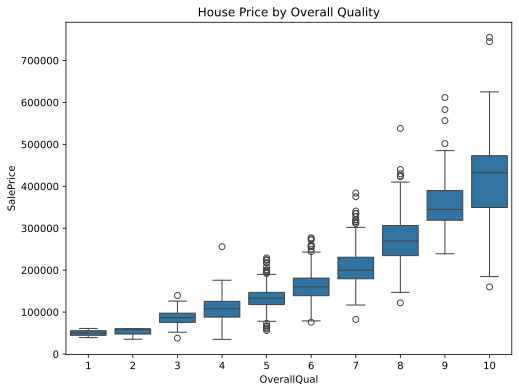

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
title = plt.title('House Price by Overall Quality')

Correlation:  0.7086244776126515


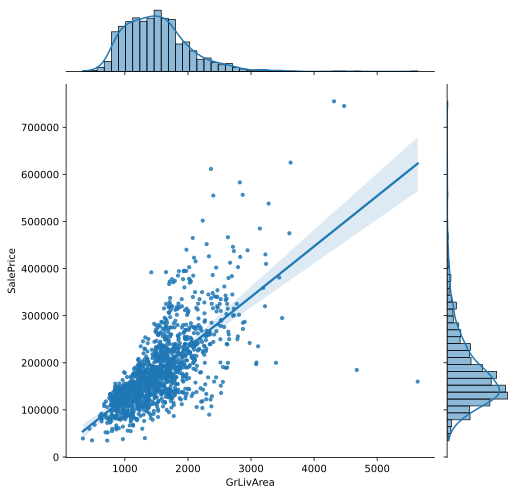

In [87]:
def plotCorrelation(variables, data):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    correlation = data[[variables[0], variables[1]]].corr().iloc[0, 1]
    print("Correlation: ", correlation)

    # Create jointplot
    sns.jointplot(x=variables[0], 
                    y=variables[1], 
                    data=data, 
                    kind='reg', 
                    height=7, 
                    scatter_kws={'s': 10}, 
                    marginal_kws={'kde': True})

    plt.show()
plotCorrelation(['GrLivArea', 'SalePrice'], train_df)

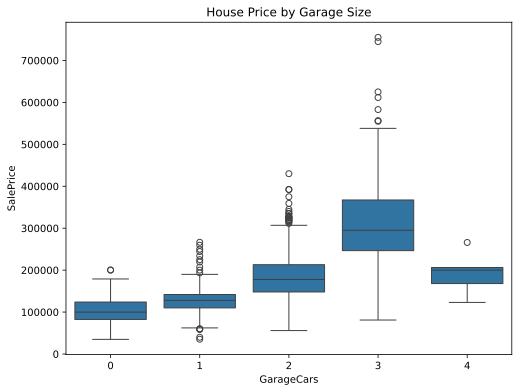

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_df)
title = plt.title('House Price by Garage Size')

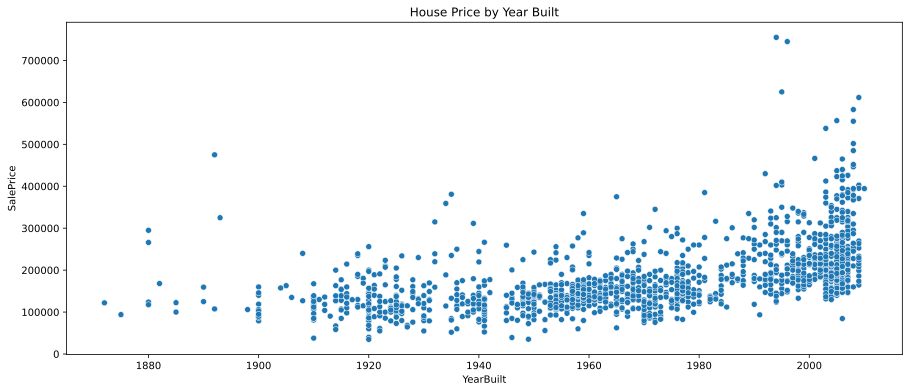

In [90]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_df)
title = plt.title('House Price by Year Built')

**Let's plot a heatmap of numeric feature correlations over 0.5, excluding 'SalePrice'.**

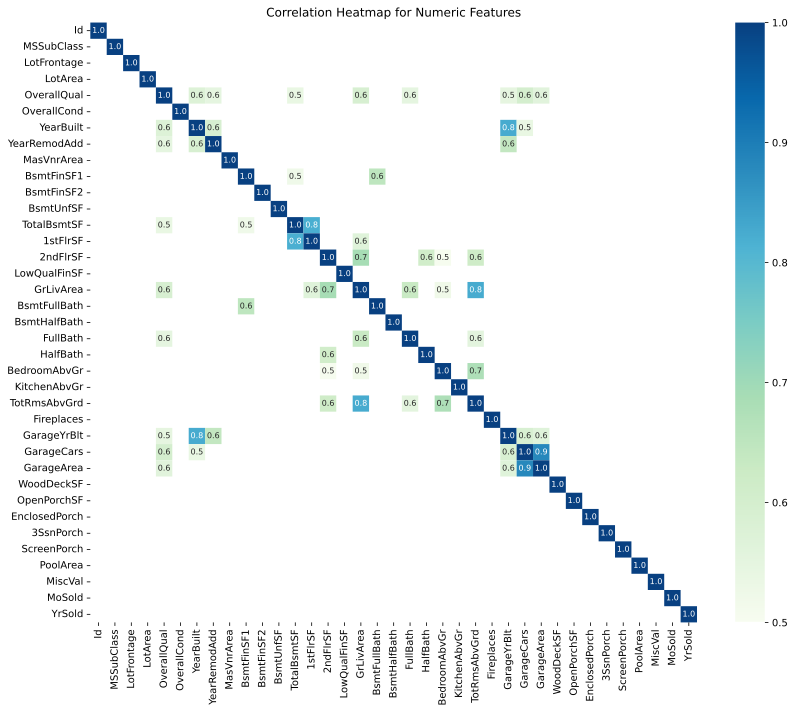

In [135]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])
corr_mat = numeric_df.drop('SalePrice', axis=1).corr()
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5] # Select correlations greater than 0.5

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            annot_kws={'size': 8},
            vmax=1),
plt.title('Correlation Heatmap for Numeric Features')
plt.tight_layout()
plt.show()

## Categorical Columns

In [121]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

def categorical_feature_importance(df, target_column, cat_columns=None):
    """
    Calculate the importance of categorical features in relation to a target variable.
    
    Parameters:
    df (pandas.DataFrame): The input dataframe
    target_column (str): The name of the target variable column
    cat_columns (list): List of categorical column names. If None, all object columns will be considered.
    
    Returns:
    pandas.DataFrame: A dataframe with feature importances, sorted in descending order
    """
    # If cat_columns is not provided, use all object columns
    if cat_columns is None:
        cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Create a copy of the dataframe with only categorical features and target
    df_cat = df[cat_columns + [target_column]].copy()
    
    # Label encode categorical variables
    le = LabelEncoder()
    for col in cat_columns:
        df_cat[col] = le.fit_transform(df_cat[col].astype(str))
    
    # Prepare the feature matrix and target vector
    X = df_cat[cat_columns]
    y = df_cat[target_column]
    
    # Train a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Get feature importances
    importances = rf.feature_importances_
    
    # Create a dataframe of feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': cat_columns,
        'Importance': importances
    })
    
    # Sort by importance in descending order
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
    
    return feature_importance_df

result = categorical_feature_importance(train_df, 'SalePrice')
result.head(10)

,Feature,Importance
0,ExterQual,0.340746
1,BsmtQual,0.147554
2,FireplaceQu,0.072991
3,Neighborhood,0.059438
4,KitchenQual,0.059025
5,GarageType,0.043171
6,BsmtExposure,0.022432
7,GarageFinish,0.018578
8,Exterior2nd,0.016816
9,RoofMatl,0.015464


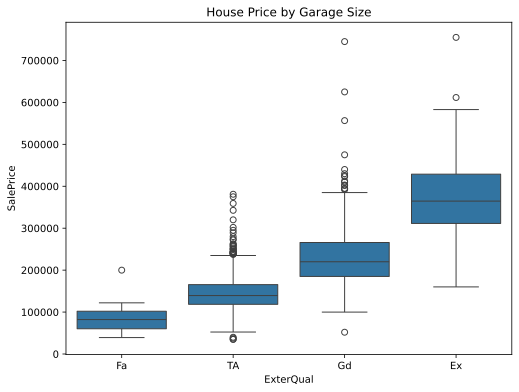

In [143]:
# Calculate the median SalePrice for each category of ExterQual
median_values = train_df.groupby('ExterQual')['SalePrice'].median().sort_values()
ordered_categories = median_values.index

plt.figure(figsize=(8, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=train_df, order=ordered_categories)
plt.title('House Price by Garage Size')
plt.show()

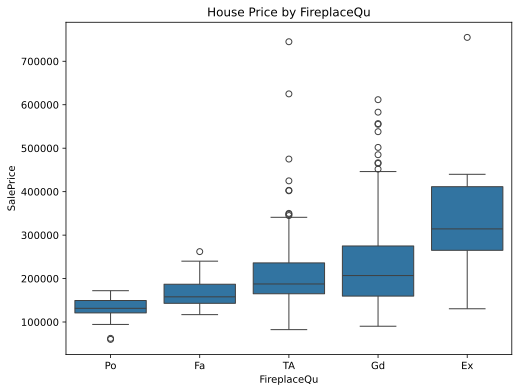

In [120]:
# Calculate the median SalePrice for each category of ExterQual
median_values = train_df.groupby('FireplaceQu')['SalePrice'].median().sort_values()
ordered_categories = median_values.index

plt.figure(figsize=(8, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=train_df, order=ordered_categories)
plt.title('House Price by FireplaceQu')
plt.show()

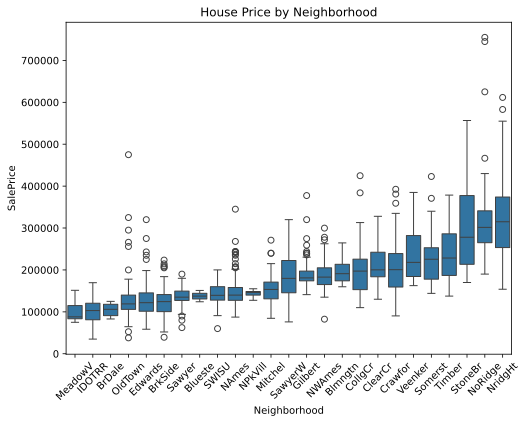

In [122]:
# Calculate the median SalePrice for each category of ExterQual
median_values = train_df.groupby('Neighborhood')['SalePrice'].median().sort_values()
ordered_categories = median_values.index

plt.figure(figsize=(8, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df, order=ordered_categories)
plt.xticks(rotation = 45)
plt.title('House Price by Neighborhood')
plt.show()

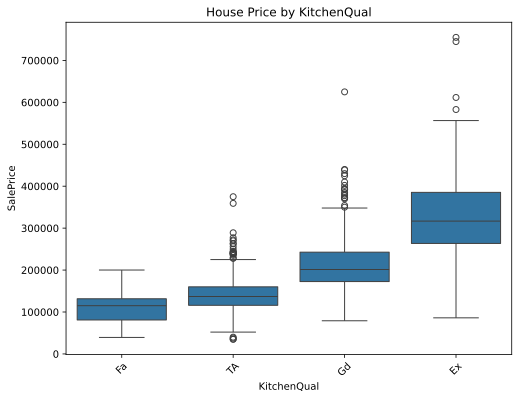

In [123]:
# Calculate the median SalePrice for each category of ExterQual
median_values = train_df.groupby('KitchenQual')['SalePrice'].median().sort_values()
ordered_categories = median_values.index

plt.figure(figsize=(8, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=train_df, order=ordered_categories)
plt.xticks(rotation = 45)
plt.title('House Price by KitchenQual')
plt.show()

## Checking outliers

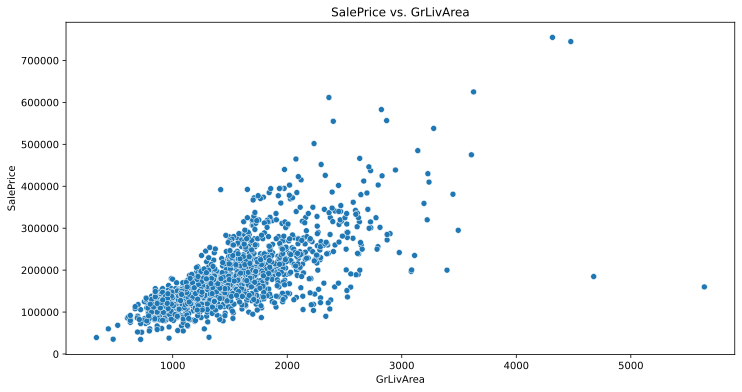

In [153]:
# Scatter plot for SalePrice vs. GrLivArea
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title('SalePrice vs. GrLivArea')
plt.show()
